In [2]:
import discharge

# Capacitors
Suppose we have a circuit with only one component, a capacitor with a capacitance of $C$ farads, along with a power source supplying a voltage of $E$ volts.
$$ \frac{1}{C} \int i \cdot dt = V_C = E$$
## In Parallel
It then follows that the current drawn by the capacitor that is in parallel with other nodes of the circuit is proportional to the instantaneous rate of change of the voltage.
$$ i = C \frac{dV_C}{dt} = C V_C'(t)$$
This property makes it a good stabilizer.  During a voltage spike, it will draw a current that is proportional to said spike;  Thus subtracting from the total current when the voltage is increasing and adding to the total current when the voltage is decreasing.
## Capacitor as a Battery
Using a capacitor as the battery or power supply of a circuit is one way of discharging one.
Suppose there is a circuit consisting of only a capacitor, serving as the 
battery or power supply of the circuit, with a capacitance of $C$ 
farads and an initial charge of $q_0$ Coloumbs and a resistor with a 
resistance of $R$ ohms.  The following equations hold true:
$$ V_C + V_R = \frac{1}{C}q(t) + Rq'(t) = 0$$
The above is a differential equation with the charge in the capacitor, 
denoted as '$q$', as the dependent variable and time ($t$) as the 
independent variable.  As such, the general solution for $q(t)$ is of the 
form:
$$ q(t) := q(t \vert C, R, q_0) = Ae^{mt}$$
To solve for $m$, we use the auxiliary equation:
$$Rm + \frac{1}{C} = 0$$
$$CRm + 1 = 0$$
$$m = - \frac{1}{CR}$$
And to solve for the arbitrary constant, $A \in \mathbb{R}$, we use the IVP:
$$ q(0) = Ae^{m \cdot 0} = A = q_0$$
This leaves us with the specific solution for the parametric function that 
gives the charge in the capacitor as a function of time.
\begin{equation}\label{eq:charge}
    q(t \vert C, R, q_0) = q_0e^{mt}
\end{equation}

In [4]:
help(discharge.gen_charge)

Help on function gen_charge in module discharge:

gen_charge(C, R, q_0)
    A parametric function that gives the charge in capacitor as a function
    of time.  The parameters are:
      C:    The capacitance in farads;
      R:    The resistance in ohms;
      q_0:  The initial charge in Coloumbs.



#### Example
This is a real life example.  I have a $50$V $10\mu\text{F}=10^{-5}$F capacitor that is fully charged.  Via the aforementioned fact, the first equation of this chapter, and substitution, the initial charge is:
$$ q_0 = 50 \text{V} \cdot 10^{-5}\text{F}=5 \cdot 10^{-4}\text{C}$$
Note that the 'C' in the above equation stands for Coloumbs, and is not to be confused with '$C$', the denotation for the capacitance.  
Let '$q(t)'$ be defined as:
$$ q(t):=q(t \vert 10\mu \text{F}, 560\Omega, 5 \cdot 10^{-4}\text{C})$$
If this were used as a power supply to a circuit containing a resistor with a resistance of $560\Omega$, then the charge of a function of time would be given by $q(t)$

In [6]:
q = discharge.gen_charge(1e-5, 560, 5e-4)
q(0.0012)

0.00040355887350269464

As one can see with the code above, the charge goes down very quickly.  After just one micro second, the charge goes down by one order of magnitude.

### Time to Discharge
The time it takes to discharge to $X$% of the initial charge is given by:
Let $t:=t(X):=t(X \vert R, C)$
$$ q_0 \cdot 0.01X = q_0e^{mt} $$
$$ 10^{-2}X = e^{mt}$$
$$ \ln(X)-2\ln(10) = mt$$
$$ t = t(X) = - CR\big(\ln(X)-2\ln(10)\big) = CR(2\ln10 - \ln X)$$

#### Example
This example uses the same capacitor as the previous example.  Below is how long it takes in milli seconds to discharge to 5% of the initial charge.


In [8]:
help(discharge.gen_time)

Help on function gen_time in module discharge:

gen_time(C, R)
    A parametric function that gives the time it takes for the charge in a 
    capacitor with a capacitance of C farads to reach X% of it's initial charge.
    The returned function accepts one argument, the desired percent of the initial charge,
    denoted as 'X'.  Said function returns the time, in seconds, that it takes to reach
    X% of the initial charge.
    Parameter:
      C:    Capacitance in farads;;
      R:    Resistance in ohms.



In [10]:
t = discharge.gen_time(1e-5, 560)
print(f't(10%)={t(10):.6f}s={t(10)*1000:.3f}ms')

t(10%)=0.012894s=12.894ms


Below is a curve given by $q(t)$.

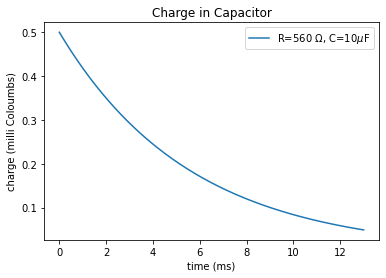

In [11]:
import numpy as np
import matplotlib.pyplot as plt
X=T=np.linspace(0.0, 0.013, num=200)
Y=Q=np.array(list(map(q, T)))
mX=X*1000
mY=Y*1000
fig, ax = plt.subplots()
ax.set_title('Charge in Capacitor')
ax.set_xlabel('time (ms)')
ax.set_ylabel('charge (milli Coloumbs)')
ax.plot(mX, mY, label=r'R=560 $\Omega$, C=10$\mu$F')
ax.legend()